In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
# from datetime import datetime
from sqlalchemy import desc
import datetime as dt
import matplotlib.dates as mdates

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()


In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)


In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Mea = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# first identify the last day of measurements
date_all = session.query(Mea.date).all()
type(date_all)

list

In [12]:
Last_Date = session.query(Mea.date).order_by(desc(Mea.date)).first()
Last_Date

('2017-08-23')

In [13]:
# Calculate the date 1 year ago from the last data point in the database
OneYear_ago = dt.datetime(2017,8,23) - dt.timedelta(days=365)
OneYear_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [36]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Mea.date, Mea.station, Mea.prcp).\
    filter(Mea.date > OneYear_ago).all()
session.close()

In [37]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'station', 'prcp'])
df.set_index('date', inplace=True, )
df.head(10)

,station,prcp
date,,
2016-08-24,USC00519397,0.08
2016-08-25,USC00519397,0.08
2016-08-26,USC00519397,0.00
2016-08-27,USC00519397,0.00
2016-08-28,USC00519397,0.01
2016-08-29,USC00519397,0.00
2016-08-30,USC00519397,0.00
2016-08-31,USC00519397,0.13
2016-09-01,USC00519397,0.00


In [16]:
# Sort the dataframe by date
df.sort_index() 

,station,prcp
date,,
2016-08-24,USC00519397,0.08
2016-08-24,USC00517948,NaN
2016-08-24,USC00519281,2.15
2016-08-24,USC00514830,2.28
2016-08-24,USC00513117,2.15
...,...,...
2017-08-22,USC00519523,0.00
2017-08-23,USC00519523,0.08
2017-08-23,USC00519397,0.00


In [17]:
# Use Pandas Plotting with Matplotlib to plot the data

# There are 9 stations; let's pick one station as an example first
df_Stat519397 = df.loc[df['station']=='USC00519397']
df_Stat519397

,station,prcp
date,,
2016-08-24,USC00519397,0.08
2016-08-25,USC00519397,0.08
2016-08-26,USC00519397,0.00
2016-08-27,USC00519397,0.00
2016-08-28,USC00519397,0.01
...,...,...
2017-08-19,USC00519397,0.00
2017-08-20,USC00519397,0.00
2017-08-21,USC00519397,0.00


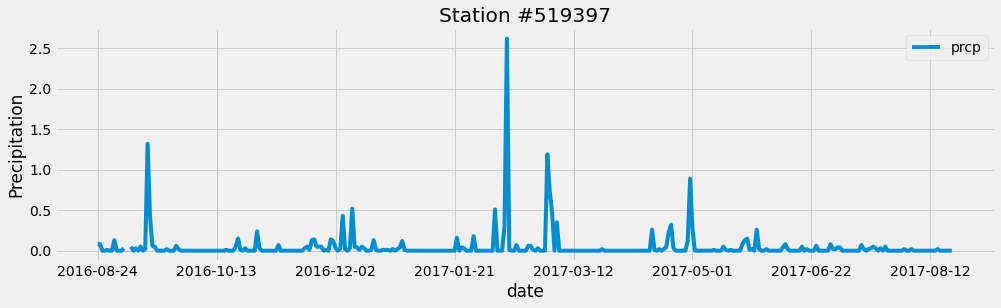

In [18]:
ax = df_Stat519397.plot(figsize=(15,4))
ax.set_ylabel("Precipitation")
plt.title('Station #519397')

# # rotate and align the tick labels so they look better
# fig.autofmt_xdate()

# # use a more precise date string for the x axis locations in the
# # toolbar
# ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

plt.show()

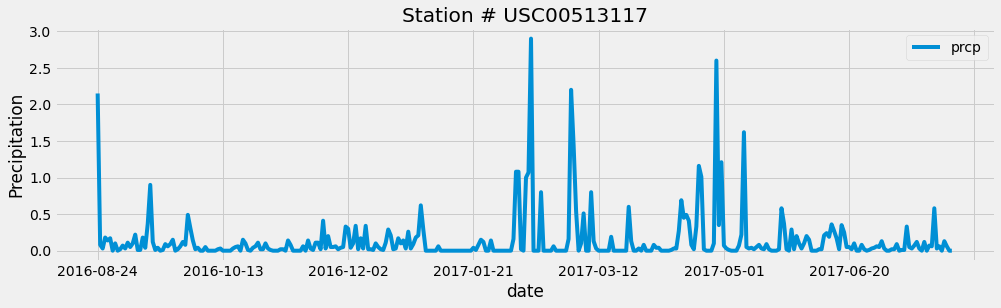

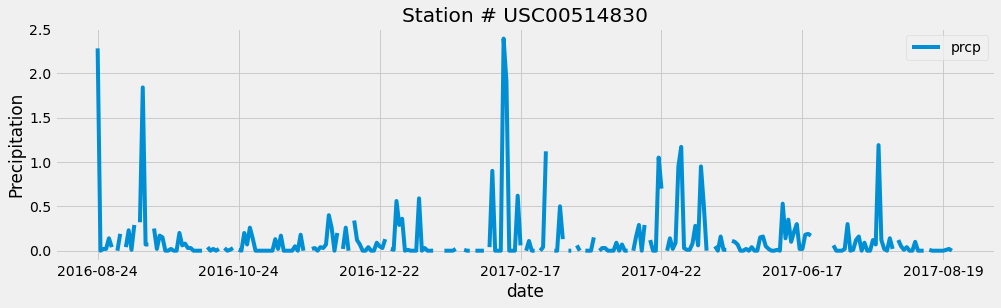

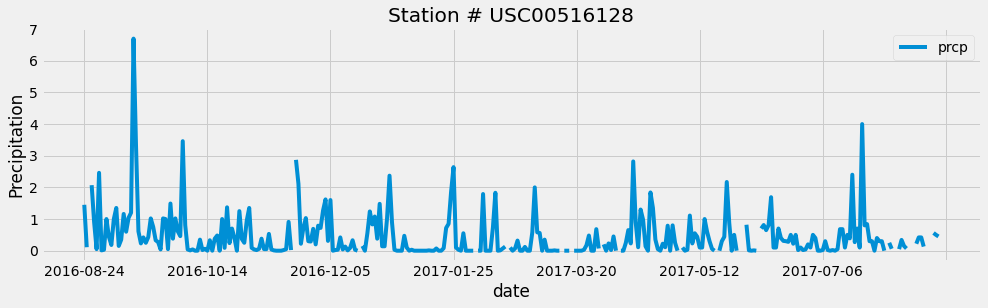

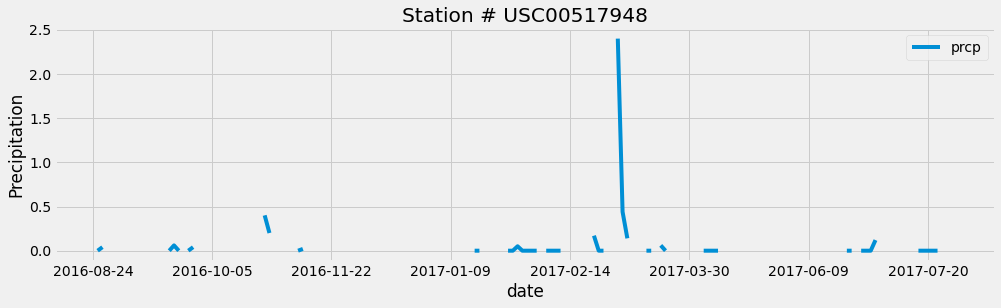

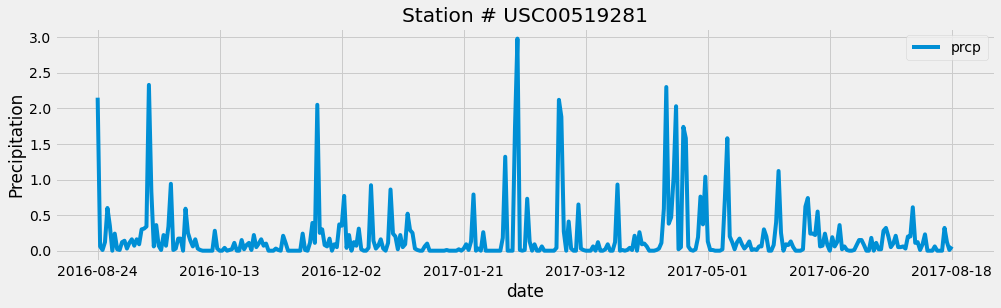

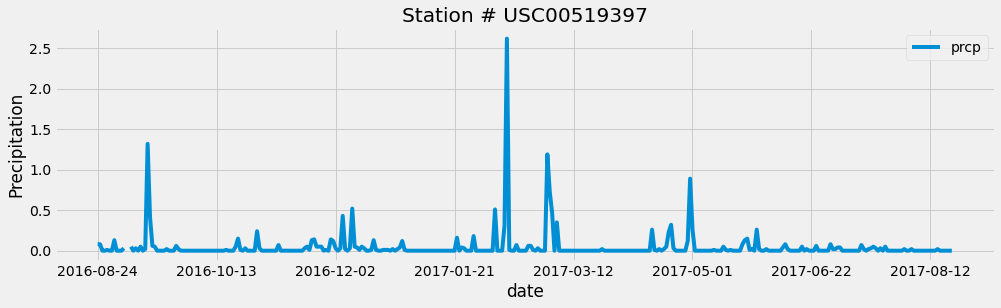

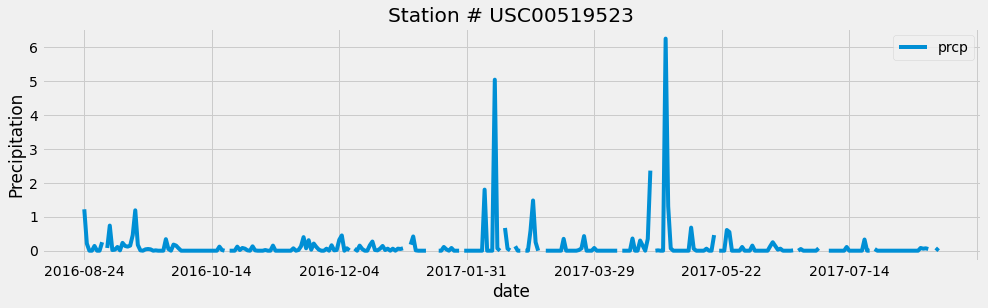

In [19]:
# do the same for all stations using a for loop
for station in np.unique(df.station):
    df_Stat = df.loc[df['station']==station]
    
    ax = df_Stat.plot(figsize=(15,4))
    ax.set_ylabel("Precipitation")
#     ax.set_xlim(dt.datetime(2016,8,23), dt.datetime(2017,8,23))
    plt.title(f'Station # {station}')

    # # rotate and align the tick labels so they look better
#     fig.autofmt_xdate()

    # # use a more precise date string for the x axis locations in the
    # # toolbar
#     ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    
    plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
results = session.query(Mea.date,Mea.station,Mea.prcp,Mea.tobs).all()
df_new = pd.DataFrame(results, columns=['date', 'station', 'prcp','tobs'])
df_new.set_index('date', inplace=True, )
df_new.head(10)

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65.0
2010-01-02,USC00519397,0.00,63.0
2010-01-03,USC00519397,0.00,74.0
2010-01-04,USC00519397,0.00,76.0
2010-01-06,USC00519397,NaN,73.0
2010-01-07,USC00519397,0.06,70.0
2010-01-08,USC00519397,0.00,64.0
2010-01-09,USC00519397,0.00,68.0
2010-01-10,USC00519397,0.00,73.0


In [22]:
np.unique(df_new.station)

array(['USC00511918', 'USC00513117', 'USC00514830', 'USC00516128',
       'USC00517948', 'USC00518838', 'USC00519281', 'USC00519397',
       'USC00519523'], dtype=object)

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
grouped = df_new.groupby(df_new.station)['station'].count().sort_values(ascending=False)
grouped

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
print(f'The most active station is {grouped.index[0]}.')

The most active station is USC00519281.


In [25]:
grouped.index[0]

'USC00519281'

In [26]:
df_new.tobs.loc[df_new.station==grouped.index[0]].describe()

count    2772.000000
mean       71.663781
std         4.357642
min        54.000000
25%        69.000000
50%        72.000000
75%        74.000000
max        85.000000
Name: tobs, dtype: float64

In [27]:
print(f'The lowest temperature recorded for Station {grouped.index[0]} is {min(df_new.tobs.loc[df_new.station==grouped.index[0]])} deg.')

The lowest temperature recorded for Station USC00519281 is 54.0 deg.


In [28]:
print(f'The highest temperature recorded for Station {grouped.index[0]} is {max(df_new.tobs.loc[df_new.station==grouped.index[0]])} deg.')

The highest temperature recorded for Station USC00519281 is 85.0 deg.


In [29]:
print(f'The mean temperature recorded for Station {grouped.index[0]} is {round(np.average(df_new.tobs.loc[df_new.station==grouped.index[0]]),2)} deg.')

The mean temperature recorded for Station USC00519281 is 71.66 deg.


In [30]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df_new.groupby(df_new.station)['tobs'].count().sort_values(ascending=False)


station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: tobs, dtype: int64

In [31]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df_Station519281 = df_new.loc[df_new['station']=='USC00519281']
df_Station519281

,station,prcp,tobs
date,,,
2010-01-01,USC00519281,0.15,70.0
2010-01-02,USC00519281,0.00,62.0
2010-01-03,USC00519281,0.00,74.0
2010-01-04,USC00519281,0.00,75.0
2010-01-05,USC00519281,0.00,74.0
...,...,...,...
2017-08-14,USC00519281,0.00,77.0
2017-08-15,USC00519281,0.32,77.0
2017-08-16,USC00519281,0.12,76.0


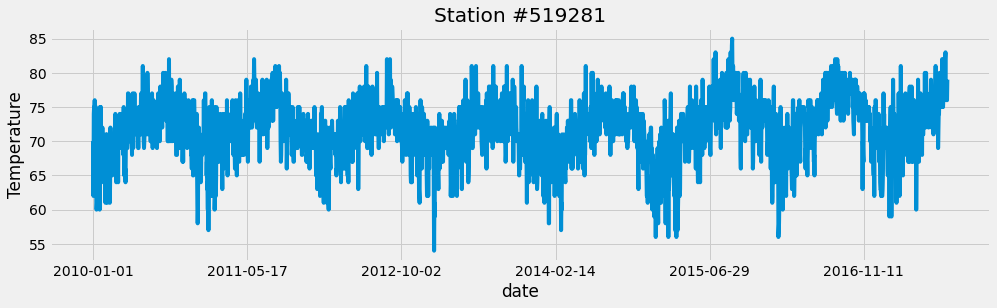

In [32]:
df_Stat519281 = df_new['tobs'].loc[df_new['station']=='USC00519281']
ax = df_Stat519281.plot(figsize=(15,4))
ax.set_ylabel("Temperature")
plt.title('Station #519281')

# # rotate and align the tick labels so they look better
# fig.autofmt_xdate()

# # use a more precise date string for the x axis locations in the
# # toolbar
# ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

plt.show()

In [33]:
df_new.index


Index(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04', '2010-01-06',
       '2010-01-07', '2010-01-08', '2010-01-09', '2010-01-10', '2010-01-11',
       ...
       '2017-08-14', '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
       '2017-08-19', '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23'],
      dtype='object', name='date', length=19550)

In [39]:
# plot the results as a histogram with bins=12
results = session.query(Mea.date, Mea.station, Mea.tobs).\
    filter(Mea.date > OneYear_ago).all()
session.close()
df = pd.DataFrame(results, columns=['date', 'station', 'tobs'])
df.set_index('date', inplace=True, )
df.head(10)

,station,tobs
date,,
2016-08-24,USC00519397,79.0
2016-08-25,USC00519397,80.0
2016-08-26,USC00519397,79.0
2016-08-27,USC00519397,77.0
2016-08-28,USC00519397,78.0
2016-08-29,USC00519397,78.0
2016-08-30,USC00519397,79.0
2016-08-31,USC00519397,80.0
2016-09-01,USC00519397,81.0


In [41]:
df_Stat519281_lastYear = df['tobs'].loc[df['station']=='USC00519281']
df_Stat519281_lastYear

date
2016-08-24    77.0
2016-08-25    80.0
2016-08-26    80.0
2016-08-27    75.0
2016-08-28    73.0
              ... 
2017-08-14    77.0
2017-08-15    77.0
2017-08-16    76.0
2017-08-17    76.0
2017-08-18    79.0
Name: tobs, Length: 351, dtype: float64

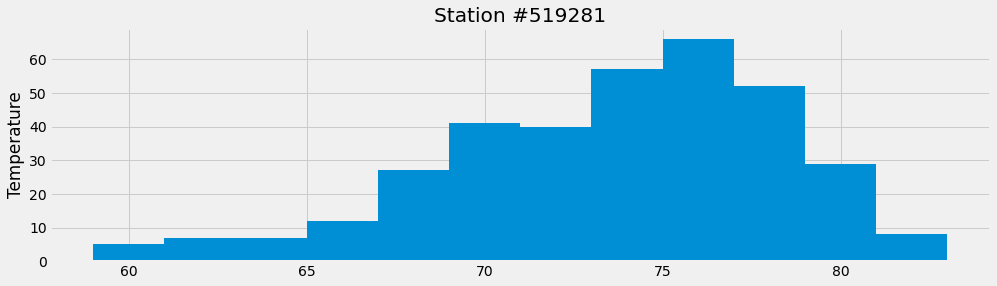

In [43]:
ax = df_Stat519281_lastYear.hist(figsize=(15,4),bins=12)
ax.set_ylabel("Temperature")
plt.title('Station #519281')

# # rotate and align the tick labels so they look better
# fig.autofmt_xdate()

# # use a more precise date string for the x axis locations in the
# # toolbar
# ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
